# Trabalho de Visualização de Dados

TRABALHO DE VISUALIZAÇÃO DE DADOS
. APRESENTAÇÃO DA EQUIPE
. APRESENTAÇÃO DO DATASET UITILIZADO
. DESCREVENDO O PROBLEMA Ex.: O Rank dos 10 melhores países por produto
. DESCREVENDO A SOLUÇÃO	
	- Comparação (Samuel)
	- Relacionamento (Abner)
	- Distribuição (Wendel)
	- Composição (Emiliandro)
Implementar todos os gráficos ensinados na aula, porém apresentar apenas o que melhor se encaixa na solução.

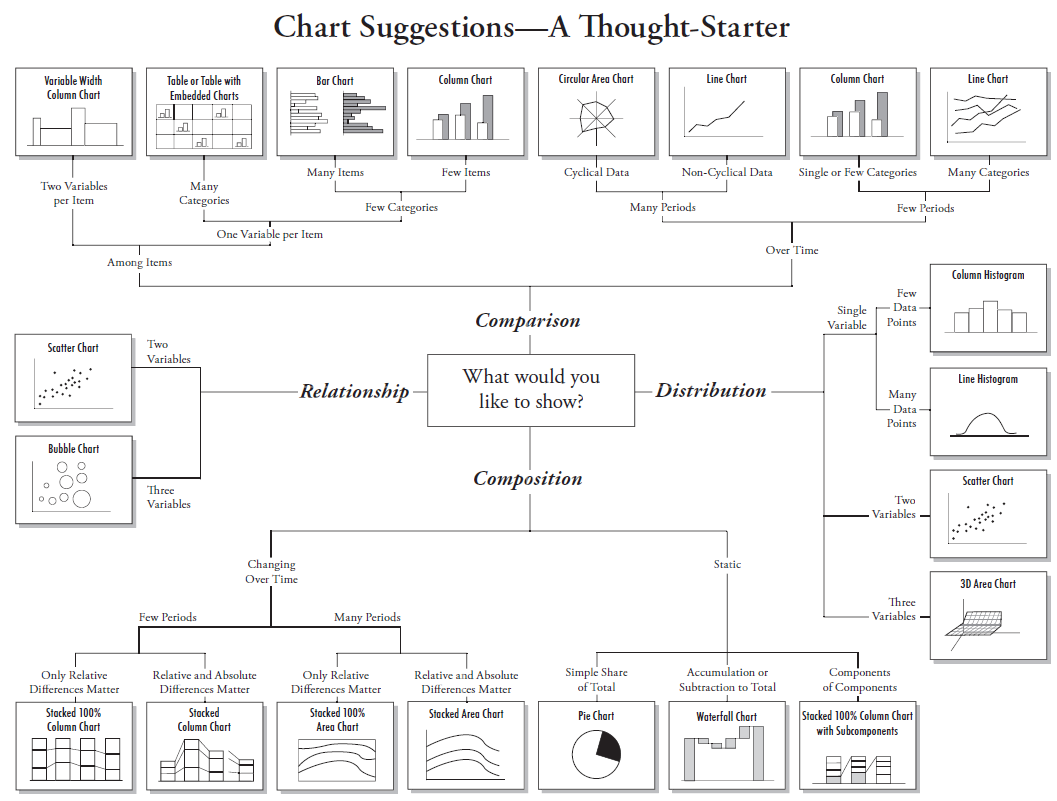

https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf

# Importação de Bibliotecas e Dados

### Fonte de dados

##### https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos

##### https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from os import listdir
from os.path import isfile, join

In [2]:
sns.set_theme()

In [3]:
%%time
files = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f)) 
         and join(os.getcwd(), f)[-3:] == 'csv' 
         and f[:8] == 'datatran']
files

Wall time: 6.97 ms


['datatran2007.csv',
 'datatran2008.csv',
 'datatran2009.csv',
 'datatran2010.csv',
 'datatran2011.csv',
 'datatran2012.csv',
 'datatran2013.csv',
 'datatran2014.csv',
 'datatran2015.csv',
 'datatran2016.csv',
 'datatran2017.csv',
 'datatran2018.csv',
 'datatran2019.csv',
 'datatran2020.csv']

In [4]:
colunas_excluir = ['id','uso_solo','sentido_via','tipo_pista','tracado_via',
                   'ano','ignorados','horario','pessoas','veiculos',
                   'feridos_leves','feridos_graves','classificacao_acidente','municipio','uf',
                   'uop','delegacia','regional']

In [5]:
df_manaus = pd.DataFrame()

In [6]:
%%time
for f in files:
    df_temp = pd.DataFrame()
    df_temp = pd.read_csv(f, sep=';', low_memory=False)
    print("Arquivo: "+ f)
    df_temp = df_temp[df_temp['municipio'] == 'MANAUS'].copy()
    for coluna in colunas_excluir:
        if coluna in df_temp.columns:
            df_temp.drop(coluna, inplace=True, axis=1)
    df_manaus = pd.concat([df_manaus,df_temp])

Arquivo: datatran2007.csv
Arquivo: datatran2008.csv
Arquivo: datatran2009.csv
Arquivo: datatran2010.csv
Arquivo: datatran2011.csv
Arquivo: datatran2012.csv
Arquivo: datatran2013.csv
Arquivo: datatran2014.csv
Arquivo: datatran2015.csv
Arquivo: datatran2016.csv
Arquivo: datatran2017.csv
Arquivo: datatran2018.csv
Arquivo: datatran2019.csv
Arquivo: datatran2020.csv
Wall time: 5.92 s


## Criando o Dataframe Manaus

In [7]:
df_manaus.reset_index(inplace=True, drop=True)

In [97]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos,latitude,longitude
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1,NaN,NaN
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0,NaN,NaN
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2,NaN,NaN
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0,NaN,NaN
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0,NaN,NaN


## Formatando Dataframe

### Convertendo tipos

In [9]:
df_manaus['tipo_acidente'] = df_manaus['tipo_acidente'].astype('category')
df_manaus['causa_acidente'] = df_manaus['causa_acidente'].astype('category')
df_manaus['data_inversa'] = df_manaus['data_inversa'].astype('datetime64')

In [10]:
df_manaus['km'].replace(',','.', regex=True, inplace=True)
df_manaus['km'] = df_manaus['km'].astype('float')

In [11]:
#df_manaus.dropna(axis=0, inplace=True)
#df_manaus['br'].replace(np.NaN,174,regex=True, inplace=True)
#df_manaus['br'] = df_manaus['br'].astype('int32')

In [12]:
df_manaus['dia_semana'].replace('segunda-feira','segunda', regex=True,inplace=True)
df_manaus['dia_semana'].replace('terça-feira','terça', regex=True,inplace=True)
df_manaus['dia_semana'].replace('quarta-feira','quarta', regex=True,inplace=True)
df_manaus['dia_semana'].replace('quinta-feira','quinta', regex=True,inplace=True)
df_manaus['dia_semana'].replace('sexta-feira','sexta', regex=True,inplace=True)
df_manaus['dia_semana'].replace('sábado','sábado', regex=True,inplace=True)
df_manaus['dia_semana'].replace('domingo','domingo', regex=True,inplace=True)
df_manaus['dia_semana'] = df_manaus['dia_semana'].str.lower()

df_manaus['dia_semana'] = df_manaus['dia_semana'].astype('category')

In [13]:
df_manaus['condicao_metereologica'].replace('Céu Claro','ceu claro', inplace = True)
df_manaus['condicao_metereologica'].replace('Ignorada','ignorado', inplace = True)
df_manaus['condicao_metereologica'] = df_manaus['condicao_metereologica'].str.lower()

df_manaus['condicao_metereologica'] = df_manaus['condicao_metereologica'].astype('category')

In [14]:
df_manaus['fase_dia'] = df_manaus['fase_dia'].str.lower()

df_manaus['fase_dia'] = df_manaus['fase_dia'].astype('category')

In [15]:
df_manaus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_inversa            1346 non-null   datetime64[ns]
 1   dia_semana              1346 non-null   category      
 2   br                      1345 non-null   object        
 3   km                      1345 non-null   float64       
 4   causa_acidente          1346 non-null   category      
 5   tipo_acidente           1346 non-null   category      
 6   fase_dia                1346 non-null   category      
 7   condicao_metereologica  1346 non-null   category      
 8   mortos                  1346 non-null   int64         
 9   ilesos                  1346 non-null   int64         
 10  feridos                 1346 non-null   int64         
 11  latitude                197 non-null    object        
 12  longitude               197 non-null    object  

# Salvando

In [16]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos,latitude,longitude
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1,NaN,NaN
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0,NaN,NaN
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2,NaN,NaN
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0,NaN,NaN
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0,NaN,NaN


In [16]:
#df_manaus.to_csv("2007_2020_Manaus.csv", sep=";", index=False)

-----------

# Gráficos

## Comparação

## Relacionamento

### Scatter Chart

In [17]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos,latitude,longitude
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1,NaN,NaN
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0,NaN,NaN
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2,NaN,NaN
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0,NaN,NaN
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0,NaN,NaN


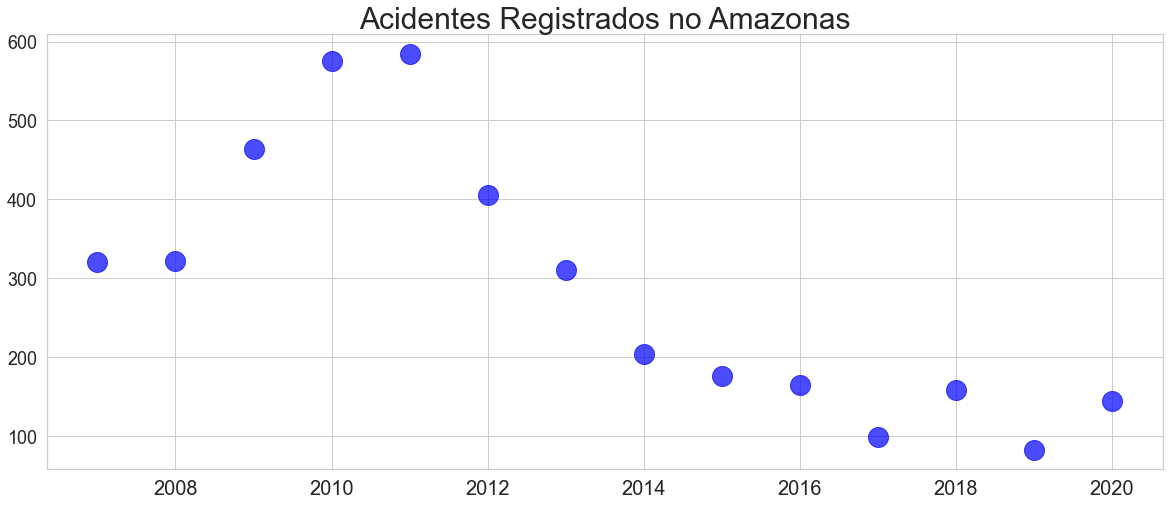

In [141]:
df_manaus['ano'] = df_manaus['data_inversa'].dt.year

df_ano = df_manaus.groupby('ano').agg({'mortos':np.sum,'ilesos':np.sum,'feridos':np.sum}).sort_index()
df_ano['vitimas'] = df_ano['mortos'] + df_ano['ilesos'] + df_ano['feridos']
df_ano.reset_index(inplace=True)

y = df_ano['vitimas']
x = df_ano['ano']

plt.figure(figsize=(20,8))
sns.set_style('whitegrid')

plt.scatter(x, y,
            s=400,
            c='blue',
            alpha=.7)

plt.title('Acidentes Registrados no Amazonas', size=30)
plt.ylabel('',size=14)
plt.xticks(size=20, rotation=0)
plt.yticks(size=18)
plt.show()

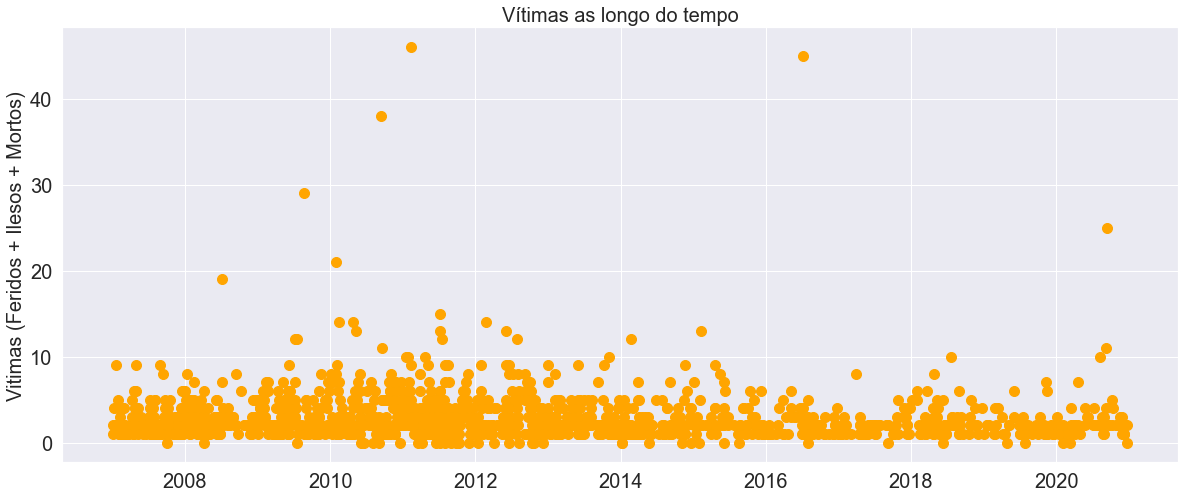

In [58]:
df_temp = df_manaus.copy()

sns.set_style('darkgrid')

y = df_temp['ilesos'] + df_temp['mortos'] + df_temp['feridos']
x = df_temp['data_inversa']

plt.figure(figsize=(20,8))

plt.scatter(x, y,
            s=100,
            c='orange')

plt.title('Vítimas as longo do tempo',size=20)
plt.ylabel('Vitimas (Feridos + Ilesos + Mortos)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('')
plt.show()

In [89]:
np.random.normal(size=4)

array([-0.01682343, -1.31698881,  0.35901751, -0.57930785])

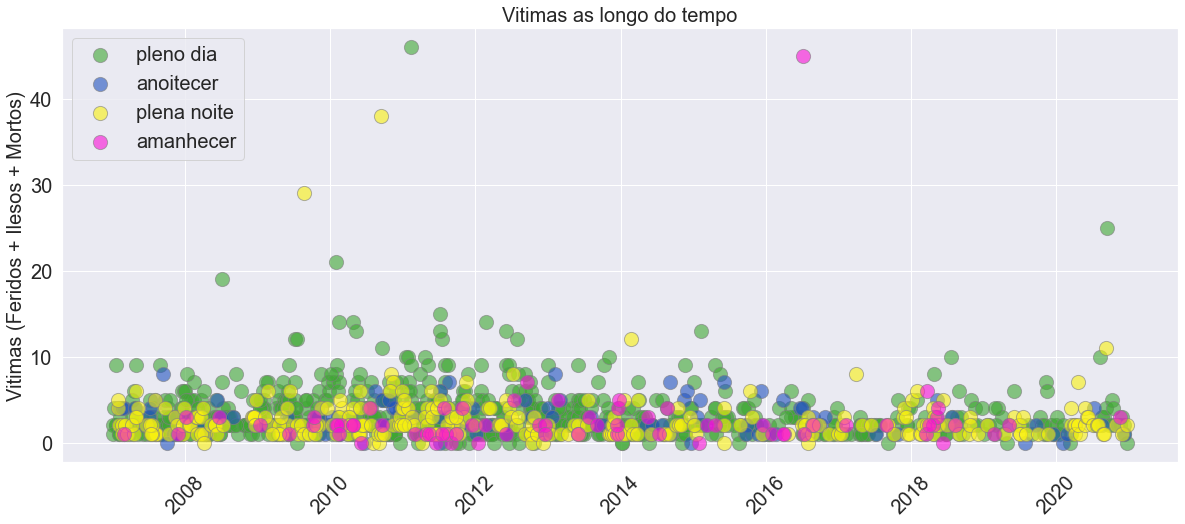

In [99]:
cores = ['#3ea832','#2153bf','#faf20f','#fa0fd7']
labels = df_manaus.fase_dia.unique()

plt.figure(figsize=(20,8))
sns.set_style("darkgrid")

for i, label in enumerate(labels):
    df_temp = df_manaus[df_manaus['fase_dia']==label]
    x = df_temp.data_inversa
    y = df_temp.mortos + df_temp.feridos + df_temp.ilesos
    plt.scatter(x, y,
                s = 200,
                c = cores[i],
                linewidths=1,
                alpha=.6,
                edgecolors='grey',
                label=label)
    
plt.legend(loc="upper left", fontsize=20)


plt.title('Vitimas as longo do tempo', size=20)
plt.ylabel('Vitimas (Feridos + Ilesos + Mortos)', size=20)
plt.xlabel('')
plt.xticks(size=20, rotation=45)
plt.yticks(size=20)
plt.show()

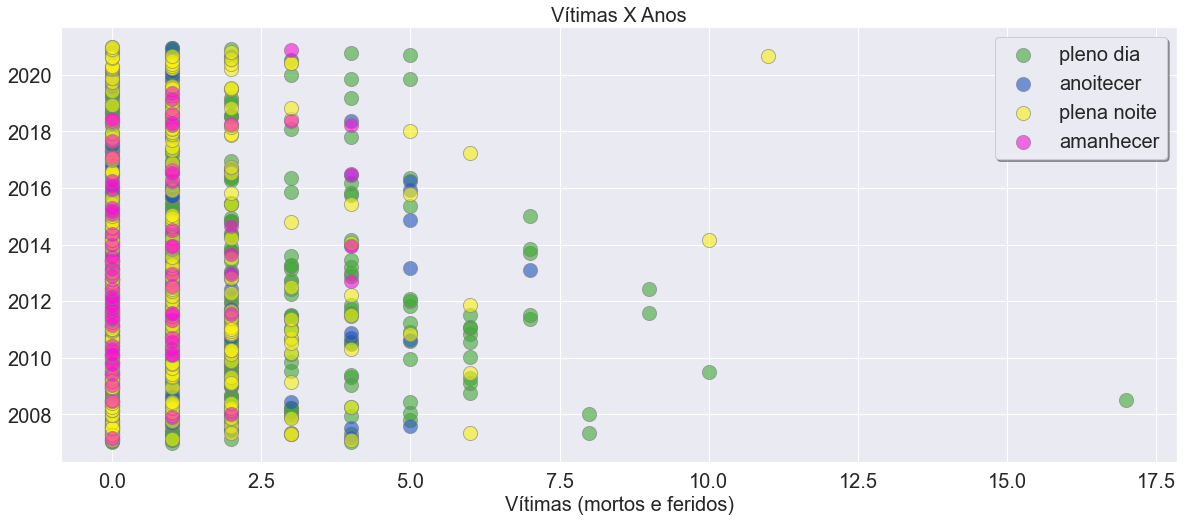

In [96]:
cores = ['#3ea832','#2153bf','#faf20f','#fa0fd7']
labels = df_manaus.fase_dia.unique()

plt.figure(figsize=(20,8))
sns.set_style("darkgrid")

for i, label in enumerate(labels):
    df_temp = df_manaus[df_manaus['fase_dia']==label]
    y = df_temp.data_inversa
    x = df_temp.mortos + df_temp.feridos
    plt.scatter(x, y,
                s = 200,
                c = cores[i],
                linewidths=1,
                alpha=.6,
                edgecolors='grey',
                label=label)
    
plt.legend(loc="upper right",
           fontsize=20,
           markerscale=1,
           shadow=True)


plt.title('Vítimas X Anos', size=20)
plt.ylabel('', size=20)
plt.xlabel('Vítimas (mortos e feridos)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### Mapa

In [19]:
import mplleaflet

In [20]:
df_geo = df_manaus[df_manaus['latitude'].notnull()].copy()

df_geo['longitude'].replace(',','.', regex=True,inplace=True)
df_geo['latitude'].replace(',','.', regex=True,inplace=True)

fig = plt.figure(figsize=(10,8))

plt.scatter(df_geo['longitude'], df_geo['latitude'],)
#plt.show()
mplleaflet.display(fig=fig)

C:\Users\abner\AppData\Roaming\Python\Python38\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


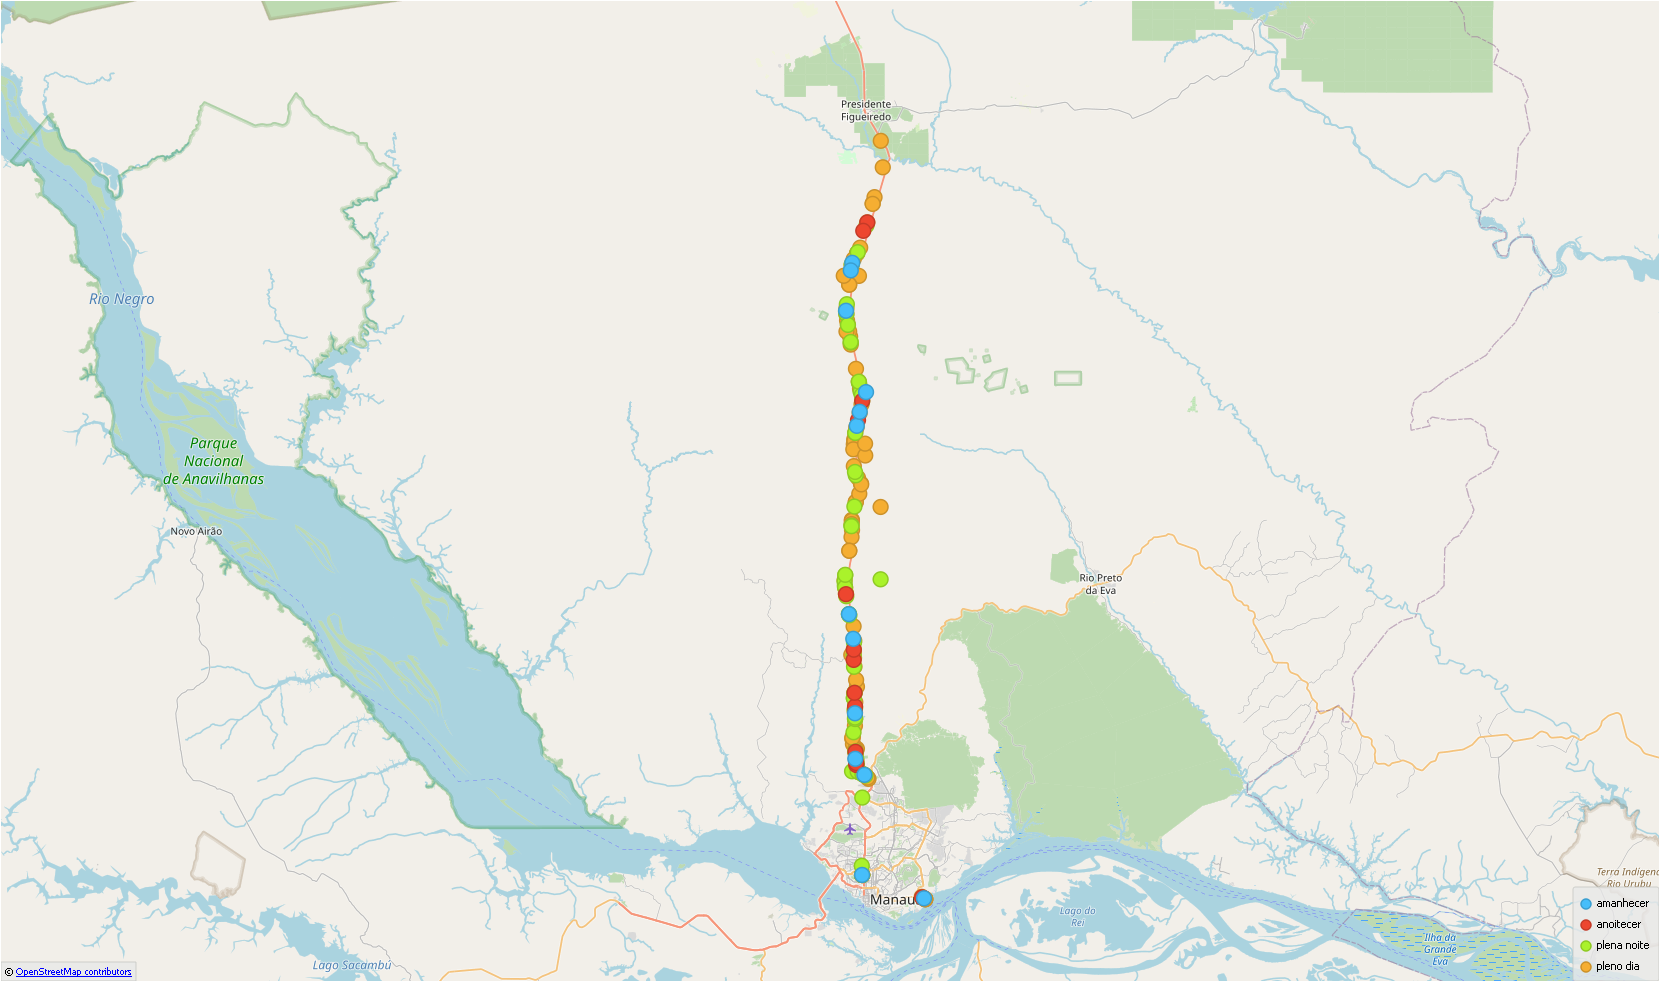

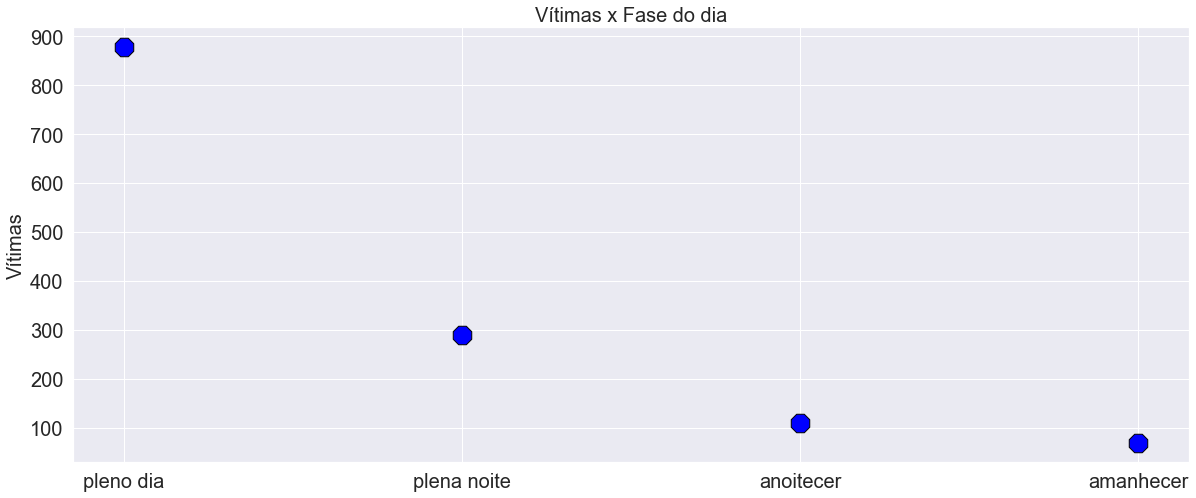

In [93]:
y = df_manaus.fase_dia.value_counts().values
x = df_manaus.fase_dia.value_counts().keys()

plt.figure(figsize=(20,8))

plt.scatter(x,y,
           s=400,
           c='blue',
           edgecolors='black',
           marker="8")
plt.title('Vítimas x Fase do dia', size=20)
plt.ylabel("Vítimas",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


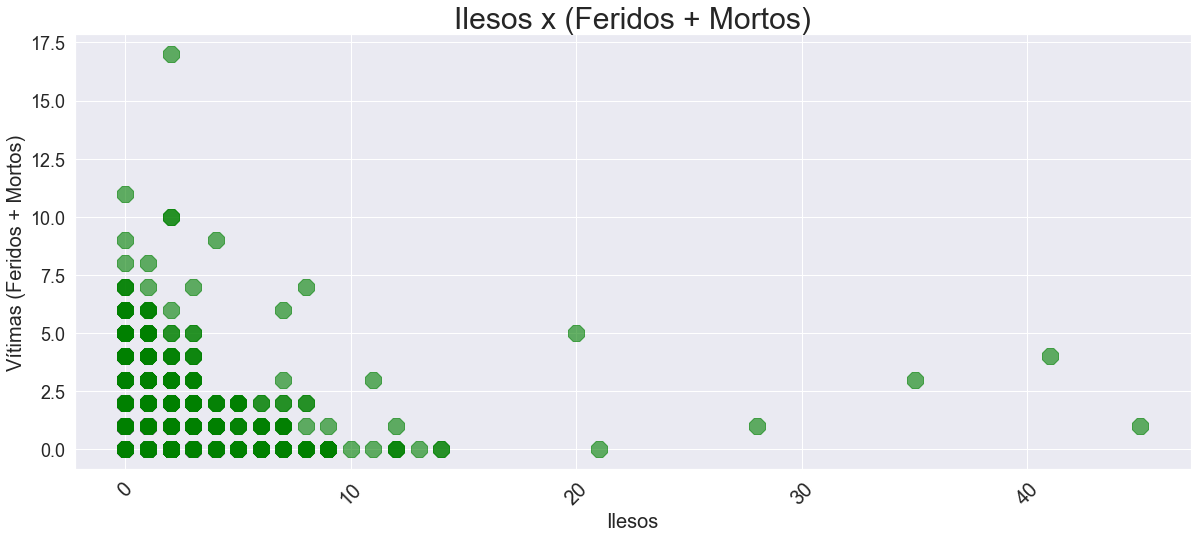

In [98]:
y = df_manaus['mortos']+ df_manaus['feridos']
x = df_manaus['ilesos']

plt.figure(figsize=(20,8))
sns.set_style('darkgrid')

plt.scatter(x, y,
            s=300,
            c='green',
            alpha=.6,
            marker='8')

plt.title('Ilesos x (Feridos + Mortos)', size=30)
plt.ylabel('Vítimas (Feridos + Mortos)',size=20)
plt.xlabel('Ilesos', size=20)
plt.xticks(size=20, rotation=45,)
plt.yticks(size=18)
plt.show()

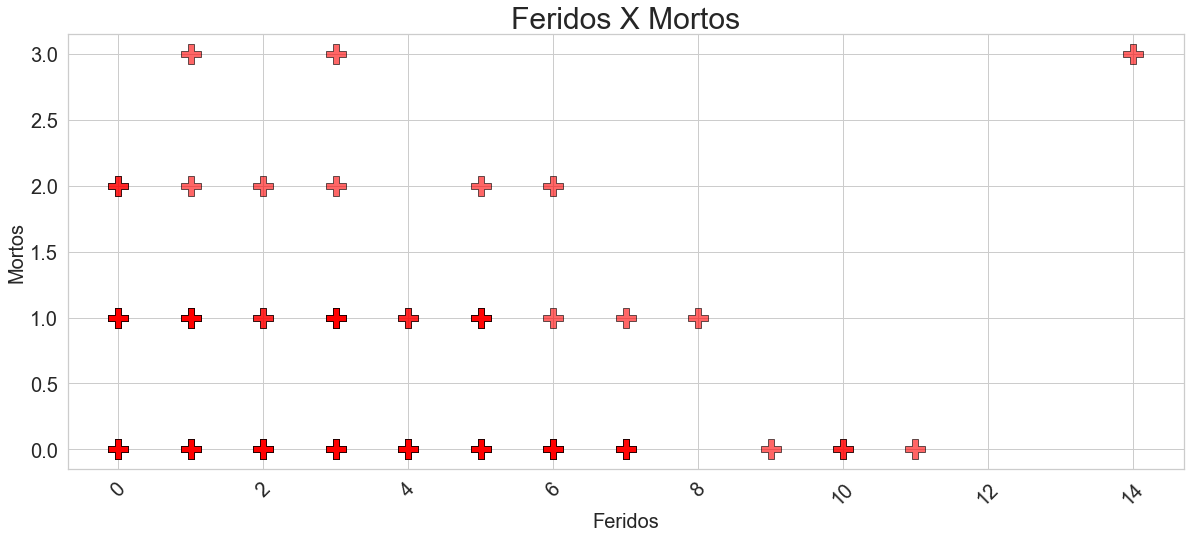

In [80]:
y = df_manaus['mortos']
x = df_manaus['feridos']

plt.figure(figsize=(20,8))
sns.set_style('whitegrid')

plt.scatter(x, y, s=400,c='red', alpha =.6, edgecolors='black', linewidths=1, marker='P',)
plt.title('Feridos X Mortos', size=30)
plt.ylabel('Mortos',size=20)
plt.xlabel('Feridos', size = 20)
plt.xticks(size=20, rotation=45)
plt.yticks(size=20)
plt.show()

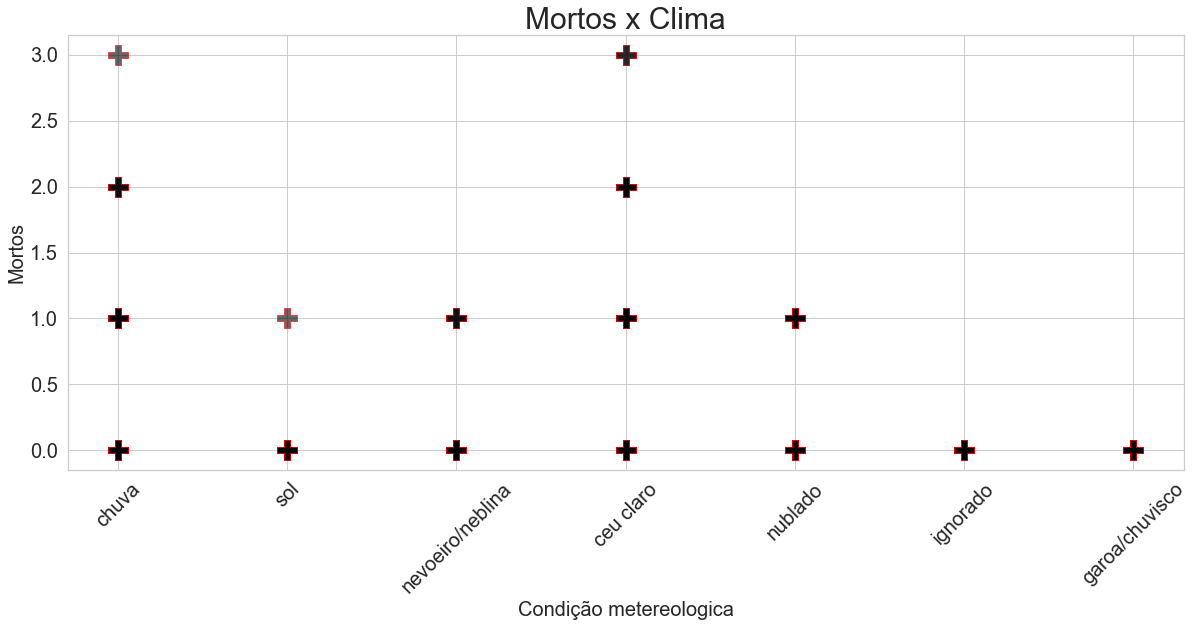

In [111]:
y = df_manaus['mortos']
x = df_manaus['condicao_metereologica']

plt.figure(figsize=(20,8))
sns.set_style('whitegrid')

plt.scatter(x, y, s=400,c='black', alpha =.6, edgecolors='red', linewidths=1, marker='P')
plt.title('Mortos x Clima', size=30)
plt.ylabel('Mortos',size=20)
plt.xlabel('Condição metereologica', size = 20)
plt.xticks(size=20, rotation=45)
plt.yticks(size=20)
plt.show()

In [17]:
df_manaus.head(1)

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos,latitude,longitude
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1,NaN,NaN


In [22]:
df_causa = df_manaus.groupby('causa_acidente').agg({'mortos':np.sum,'feridos':np.sum,'ilesos':np.sum})
df_causa.reset_index(inplace=True)

,causa_acidente,mortos,feridos,ilesos
0,Agressão Externa,0,1,0
1,Animais na Pista,1,17,34


In [52]:
df_tipo = df_manaus.groupby('tipo_acidente').agg({'mortos':np.sum,'feridos':np.sum,'ilesos':np.sum})
df_tipo['vitimas'] = df_tipo['mortos'] + df_tipo['feridos'] + df_tipo['ilesos']
df_tipo.reset_index(inplace=True)
df_tipo_top5_mortos = df_tipo.sort_values('mortos',ascending=False).head()
df_tipo_top5_feridos = df_tipo.sort_values('feridos',ascending=False).head()
df_tipo_top5_ilesos = df_tipo.sort_values('ilesos',ascending=False).head()

In [53]:
df_tipo_top5_mortos

,tipo_acidente,mortos,feridos,ilesos,vitimas
10,Colisão frontal,28,192,212,432
21,Saída de Pista,18,333,503,854
3,Atropelamento de pessoa,17,36,88,141
1,Atropelamento de Pedestre,8,12,17,37
13,Colisão traseira,7,212,1087,1306


In [54]:
df_tipo_top5_feridos

,tipo_acidente,mortos,feridos,ilesos,vitimas
21,Saída de Pista,18,333,503,854
13,Colisão traseira,7,212,1087,1306
10,Colisão frontal,28,192,212,432
4,Capotamento,1,86,72,159
11,Colisão lateral,2,68,263,333


In [55]:
df_tipo_top5_ilesos

,tipo_acidente,mortos,feridos,ilesos,vitimas
13,Colisão traseira,7,212,1087,1306
21,Saída de Pista,18,333,503,854
11,Colisão lateral,2,68,263,333
10,Colisão frontal,28,192,212,432
5,Colisão Transversal,0,60,145,205


In [32]:
df_tipo.sort_values('mortos',ascending=False)

,causa_acidente,mortos,feridos,ilesos
23,Outras,22,217,489
30,Velocidade incompatível,19,144,164
16,Falta de atenção,11,273,774
19,Ingestão de álcool,6,74,123
15,Falta de Atenção à Condução,5,46,105
28,Ultrapassagem indevida,4,100,108
14,Falta de Atenção do Pedestre,4,6,13
25,Restrição de Visibilidade,3,12,3
13,Dormindo,2,57,115
6,Defeito mecânico em veículo,2,44,148


In [27]:
df_causa.sort_values('mortos',ascending=False).head()

,causa_acidente,mortos,feridos,ilesos
23,Outras,22,217,489
30,Velocidade incompatível,19,144,164
16,Falta de atenção,11,273,774
19,Ingestão de álcool,6,74,123
15,Falta de Atenção à Condução,5,46,105


In [28]:
df_causa.sort_values('feridos',ascending=False).head()

,causa_acidente,mortos,feridos,ilesos
16,Falta de atenção,11,273,774
23,Outras,22,217,489
30,Velocidade incompatível,19,144,164
28,Ultrapassagem indevida,4,100,108
19,Ingestão de álcool,6,74,123


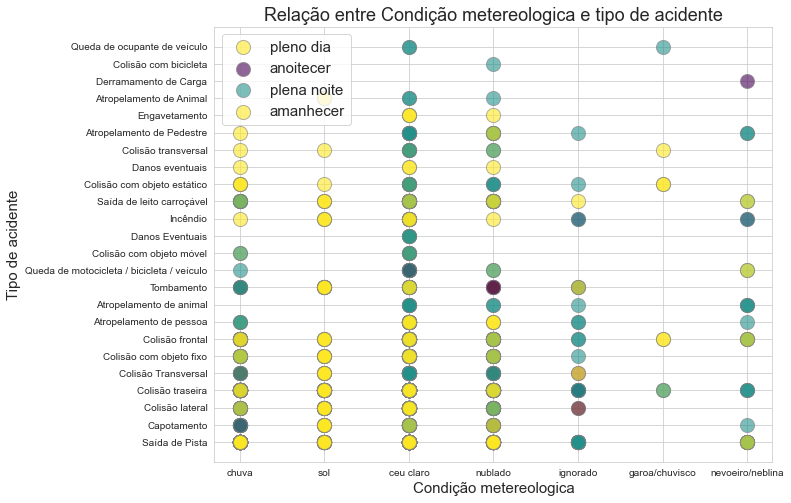

In [25]:
legenda = df_manaus['fase_dia'].unique()

plt.figure(figsize=(10,8))

colors=['#440154', '#23918B', '#FDE724']
labels=df_manaus['fase_dia'].unique()

for i, label in enumerate(labels):
    df_temp = df_manaus[df_manaus['fase_dia']==label]
    x = df_temp['condicao_metereologica']
    y = df_temp['tipo_acidente']
    plt.scatter(x, y, 
                s=200,
                c=colors[i-1],
                #cmap='viridis',
                linewidth=1,
                alpha=.6,
                edgecolors='grey',
                label=label
               )
plt.legend(loc='upper left',
           fontsize=15
          )
plt.title('Relação entre Condição metereologica e tipo de acidente', 
          fontsize=18
         )
plt.ylabel('Tipo de acidente', fontsize=15)
plt.xlabel('Condição metereologica', fontsize=15)
plt.show()

## Distribuição

## Composição